In [8]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df_ney = pd.read_csv('neymar_europa.csv')

In [10]:
gols_assist = []
for participacao in df_ney['participacoes']:
    gols_assist.append(participacao)
print(gols_assist)

[32, 49, 56, 47, 57, 34, 30, 30, 43, 40]


In [11]:
mu = df_ney['participacoes'].mean()
dp = df_ney['participacoes'].std()
var = df_ney['participacoes'].var()

print(mu)
print(dp)
print(var)

41.8
10.282671507606052
105.73333333333333


In [45]:
# mu = df_ney['participacoes'].mean()
# sigma = (df_ney['participacoes'].std())/(np.sqrt(len(df_ney)))

# a = st.norm.ppf(0.025, loc=mu, scale=sigma)
# b = st.norm.ppf(1-0.025, loc=mu, scale=sigma)
# print(f"O intervalo de confiança é entre {a} e {b}")

In [48]:
mu = df_ney['participacoes'].mean()
sigma = (df_ney['participacoes'].std())/(np.sqrt(len(df_ney)))
n = len(df_ney)
alpha = 0.05 

t_stat = st.t.ppf(1 - alpha / 2, df=n - 1)  

a = (mu - (t_stat * sigma / np.sqrt(n)))
b = (mu + (t_stat * sigma / np.sqrt(n)))

print(f"O intervalo de confiança é entre {a} e {b}")

O intervalo de confiança é entre 39.473898099695624 e 44.12610190030437


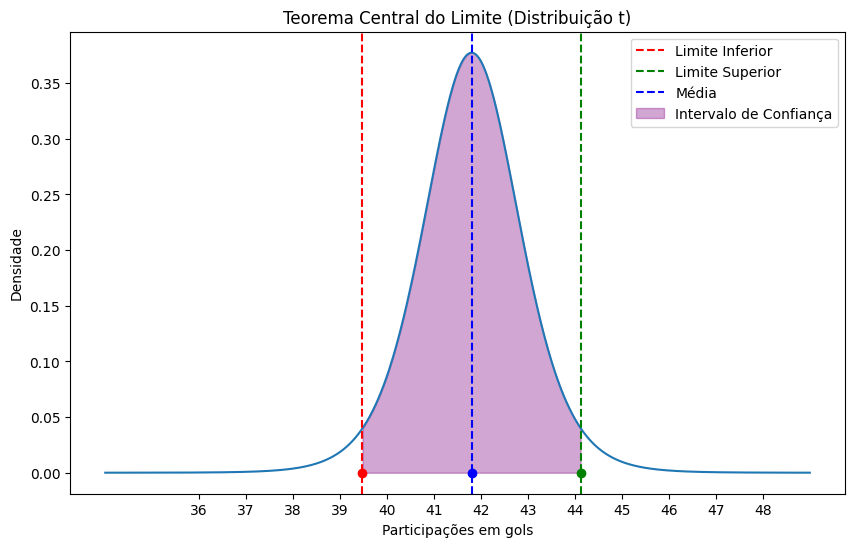

In [63]:
x = np.linspace(34, 49, 1000)
y = st.t.pdf(x, df=n - 1, loc=mu, scale=sigma / np.sqrt(n))

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.xlabel('Participações em gols')
plt.ylabel('Densidade')
plt.title('Teorema Central do Limite (Distribuição t)')
plt.axvline(x=a, color='red', linestyle='--', label='Limite Inferior')
plt.axvline(x=b, color='green', linestyle='--', label='Limite Superior')
plt.axvline(x=mu, color='blue', linestyle='--', label='Média')
plt.fill_between(x, 0, y, where=(x >= a) & (x <= b), color='purple', alpha=0.35, label='Intervalo de Confiança')
plt.xticks(np.arange(36, 49, 1))

plt.scatter(a, 0, color='red')
plt.scatter(mu, 0 , color='blue')
plt.scatter(b, 0, color='green')

plt.legend()
plt.show()